<a href="https://colab.research.google.com/github/rifatulain/deep-learning/blob/main/A_Deep_Learning_Based_Approach_for_Predicting_Sleep_Disorder_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (3).csv
User uploaded file "Sleep_health_and_lifestyle_dataset (3).csv" with length 24139 bytes


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

1. Importing Dataset

Here we are reading the database using the name "df" in the variable

In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep = ',')

In [ ]:
df["Sleep Disorder"].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

Sleep Disorder  Insomnia  None  Sleep Apnea
Gender                                     
Female                36    82           67
Male                  41   137           11


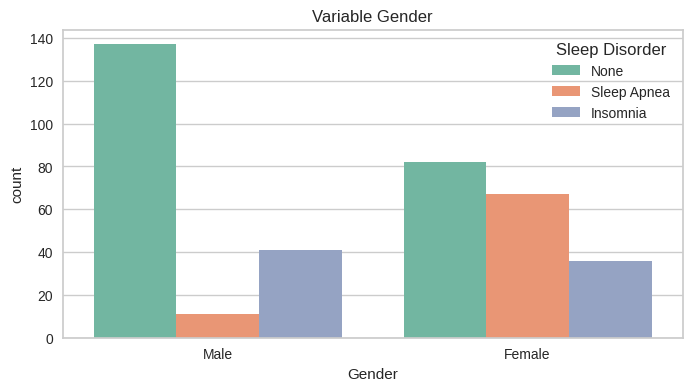

In [ ]:
# Check the crosstab result between 'Gender' and 'Sleep Disorder'
crosstab_result = pd.crosstab(df['Gender'], df['Sleep Disorder'])
print(pd.DataFrame(crosstab_result))

# Plot the countplot
plt.figure(figsize=(8, 4))
plt.gca().set_title('Variable Gender')
sns.countplot(x='Gender', hue='Sleep Disorder', palette='Set2', data=df)
plt.show()

In [ ]:
df["Occupation"].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [ ]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


2. Data Analysis.

Verifying the correlation between our variables.
Looking at the correlation of our variables, we can see that we have many correlated variables, but as we have little data in our database, we will keep them for now.

<ipython-input-210-b16af96169cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

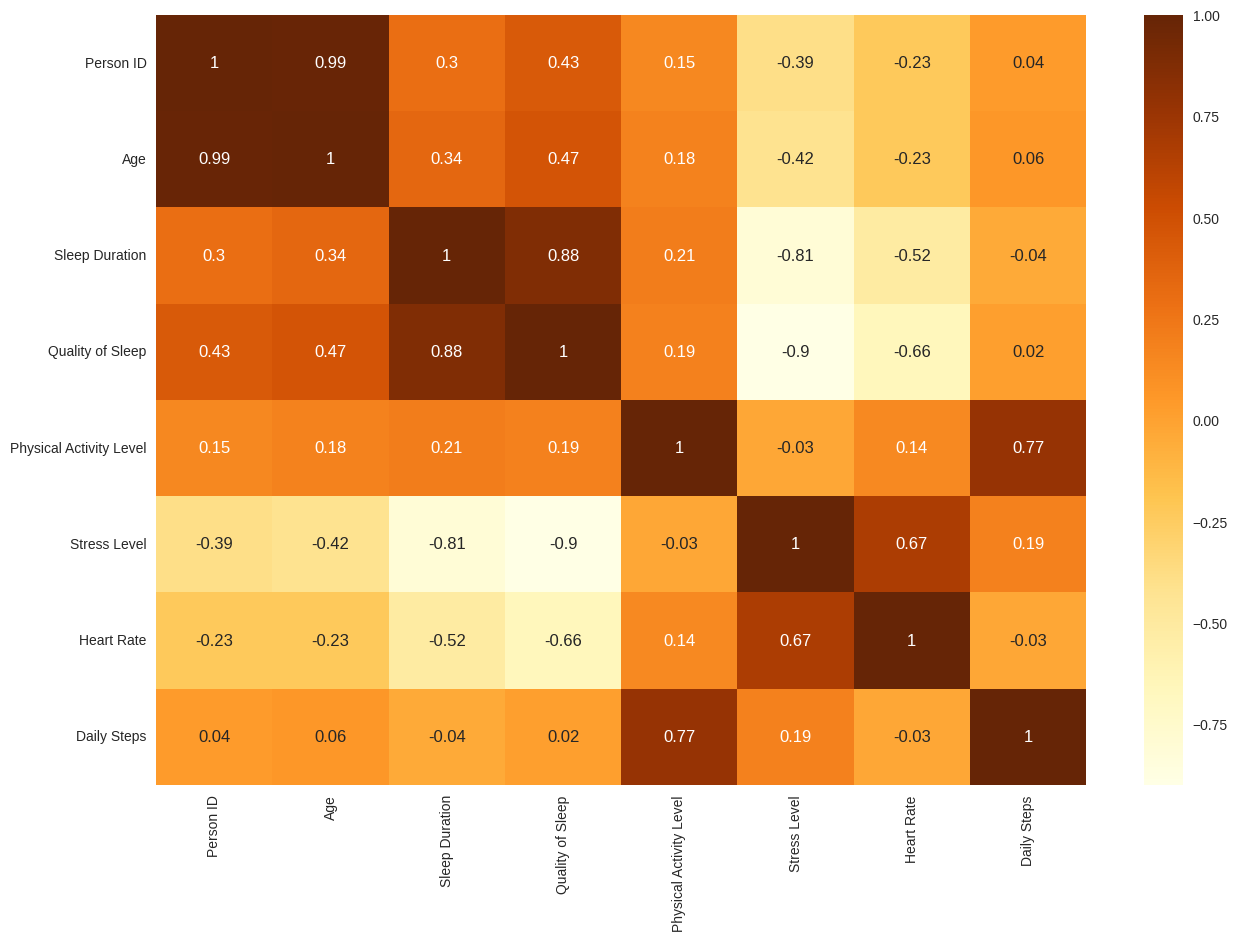

In [ ]:
corr = df.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

Categorical Variables.



Here when we look at our categorical variables we can see that our data are well distributed between males and females, looking at the BMI we can see that most people are between Normal and Overweight, and when we look at our target variable we can see that most people do not have sleep problems and those who do are well distributed between insomnia and sleep apnea.

In [ ]:
# Create a crosstab between 'Gender' and 'BMI Category'
crosstab_result = pd.crosstab(df['Gender'], df['BMI Category'])
pd.DataFrame(crosstab_result)

BMI Category,Normal,Normal Weight,Obese,Overweight
Gender,,,,
Female,64,14,1,106
Male,131,7,9,42


<Axes: title={'center': 'Variable Sleep Disorder'}, xlabel='Sleep Disorder', ylabel='count'>

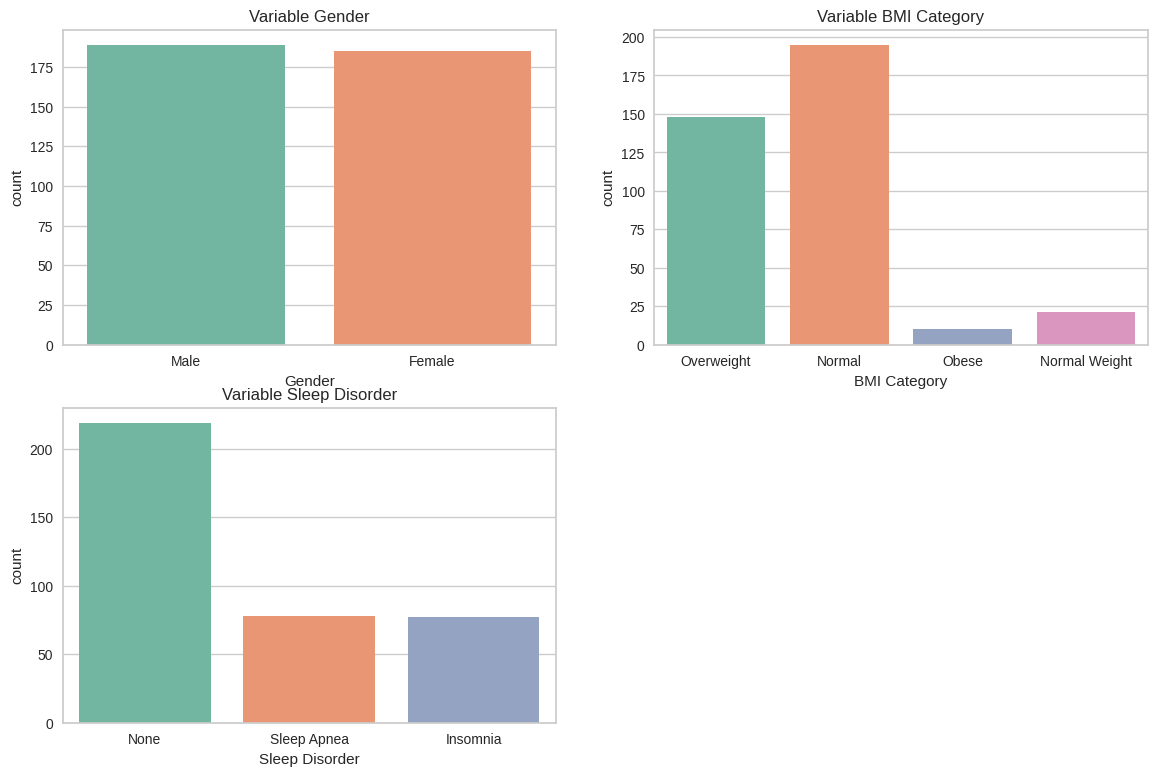

In [ ]:
plt.figure(figsize = (14, 9))

plt.subplot(2, 2, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(2, 2, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'BMI Category', palette = 'Set2', data = df)

plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Sleep Disorder')
sns.countplot(x = 'Sleep Disorder', palette = 'Set2', data = df)

Looking at the Occupation column, we can see that we have some predominance of professions.

<Axes: title={'center': 'Variable Blood Pressure'}, xlabel='Blood Pressure', ylabel='count'>

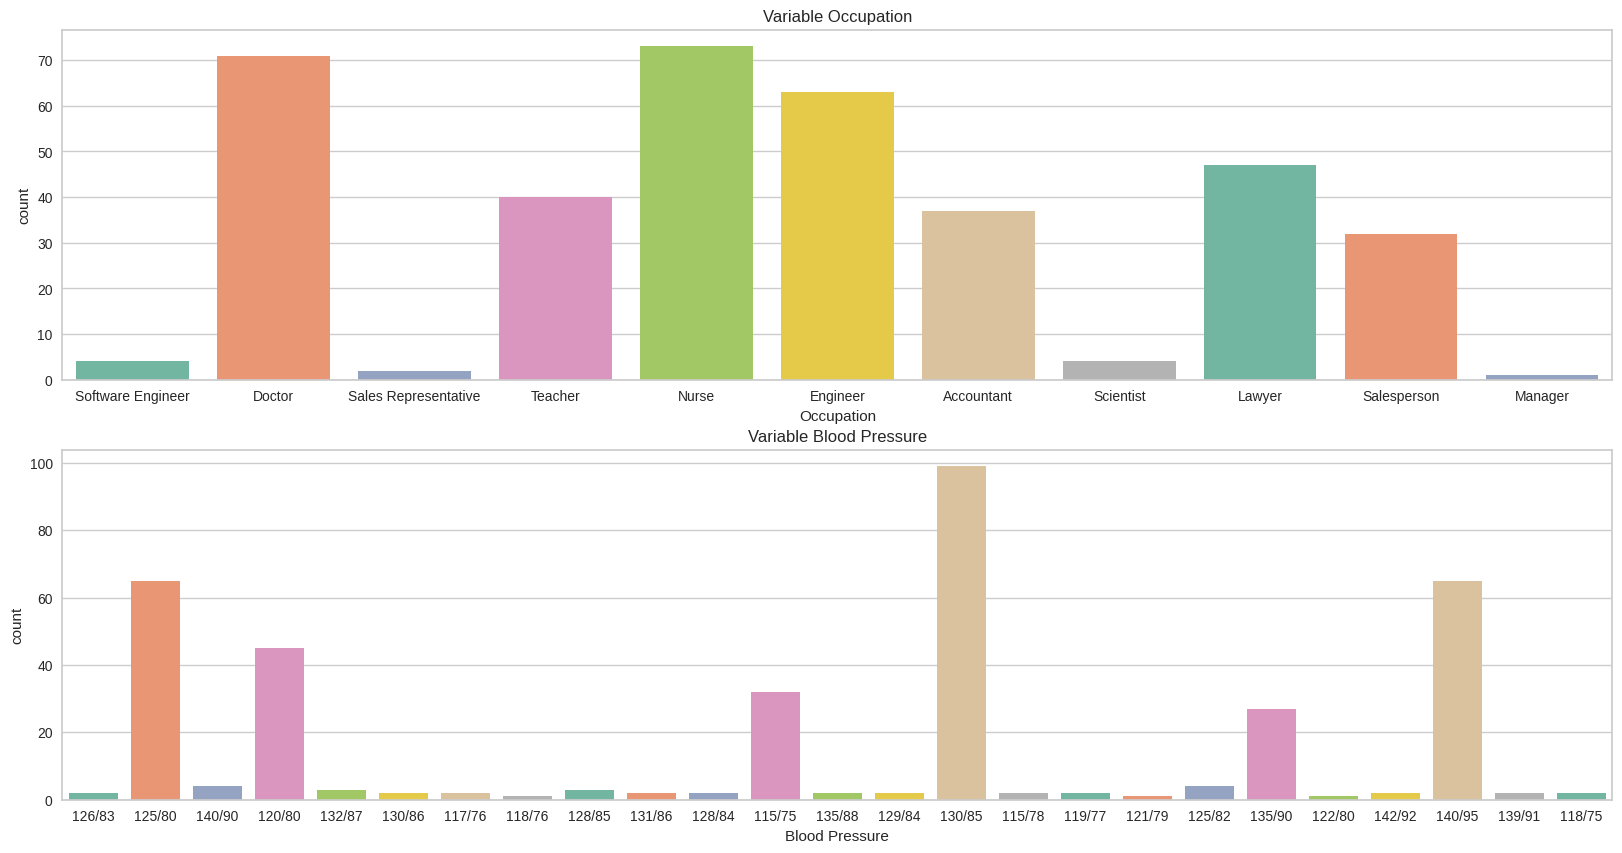

In [ ]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Occupation')
sns.countplot(x = 'Occupation', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Blood Pressure')
sns.countplot(x = 'Blood Pressure', palette = 'Set2', data = df)

Continuous Variables.

When we look at our categorical variables we can see that we do not have a pattern in most variables with practically all of them showing a balance in some data and not in others.

<Axes: xlabel='Daily Steps', ylabel='Count'>

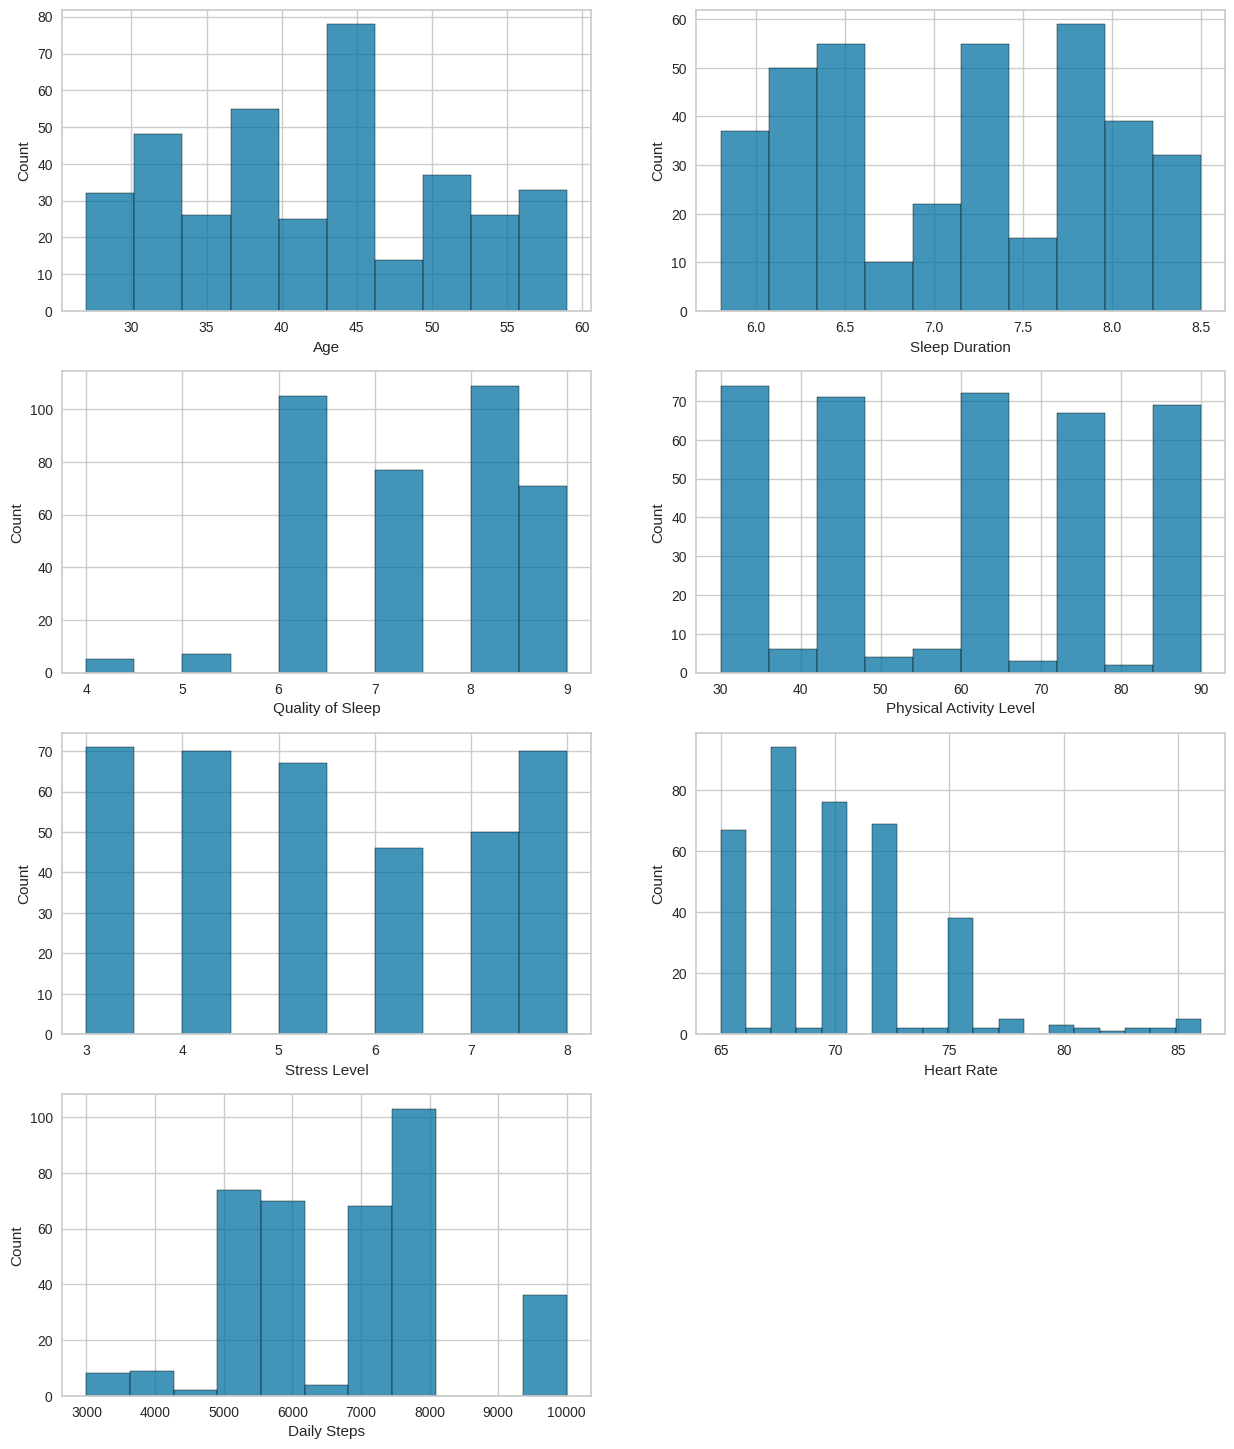

In [ ]:
plt.figure(figsize = (15, 18))

plt.subplot(4, 2, 1)
sns.histplot(x = df['Age'], kde = False)

plt.subplot(4, 2, 2)
sns.histplot(x = df['Sleep Duration'], kde = False)

plt.subplot(4, 2, 3)
sns.histplot(x = df['Quality of Sleep'], kde = False)

plt.subplot(4, 2, 4)
sns.histplot(x = df['Physical Activity Level'], kde = False)

plt.subplot(4, 2, 5)
sns.histplot(x = df['Stress Level'], kde = False)

plt.subplot(4, 2, 6)
sns.histplot(x = df['Heart Rate'], kde = False)

plt.subplot(4, 2, 7)
sns.histplot(x = df['Daily Steps'], kde = False)

Bivariate Analysis.

When we compare our Target variable with our categorical variables we can see interesting patterns, such as females having much more sleep problems than males, the same thing when we look at the BMI variable, overweight people are much more likely to have sleep problems, people of normal weight generally do not have any problems.
When we look at the patient's profession, we can see a very interesting thing, Professors, Nurses and Salesperson are much more likely to have problems with sleep, and when we look at Lawyers, Doctors and Engineers we can see that they generally don't have any problems.

<Axes: title={'center': 'Variable BMI Category'}, xlabel='BMI Category', ylabel='count'>

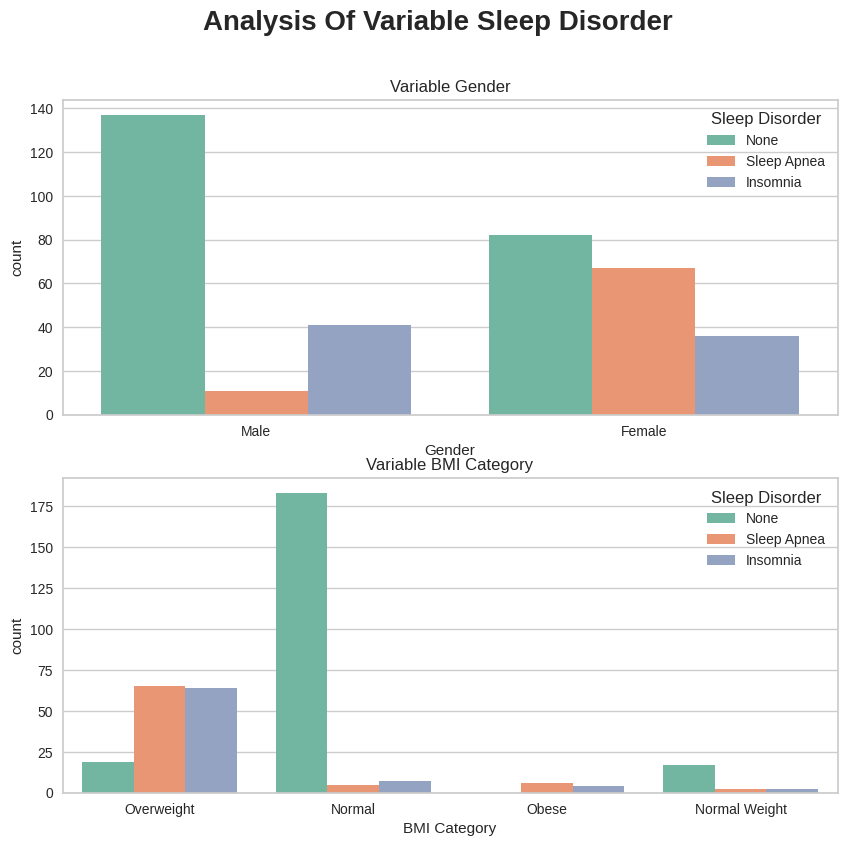

In [ ]:
plt.figure(figsize = (10, 9))
plt.suptitle("Analysis Of Variable Sleep Disorder",fontweight="bold", fontsize=20)

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Sleep Disorder', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable Blood Pressure'}, xlabel='Blood Pressure', ylabel='count'>

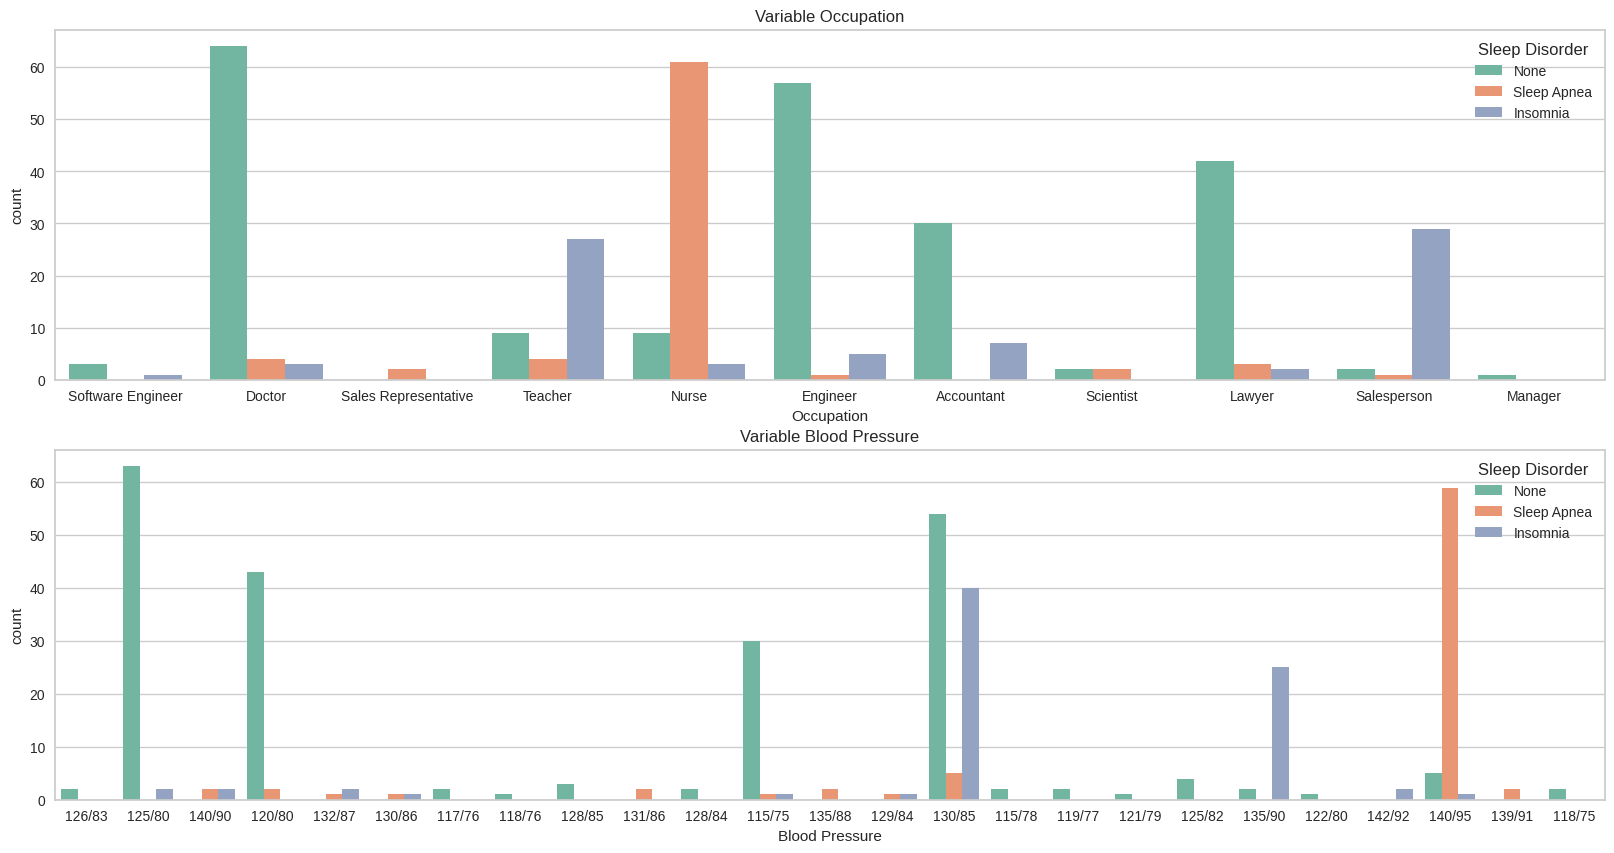

In [ ]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Occupation')
sns.countplot(x = 'Occupation', hue = 'Sleep Disorder', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Blood Pressure')
sns.countplot(x = 'Blood Pressure', hue = 'Sleep Disorder', palette = 'Set2', data = df)

Looking at the continuous variables, the thing that most draws attention is that older people are more likely to have sleep problems.

<Axes: xlabel='Sleep Disorder', ylabel='Daily Steps'>

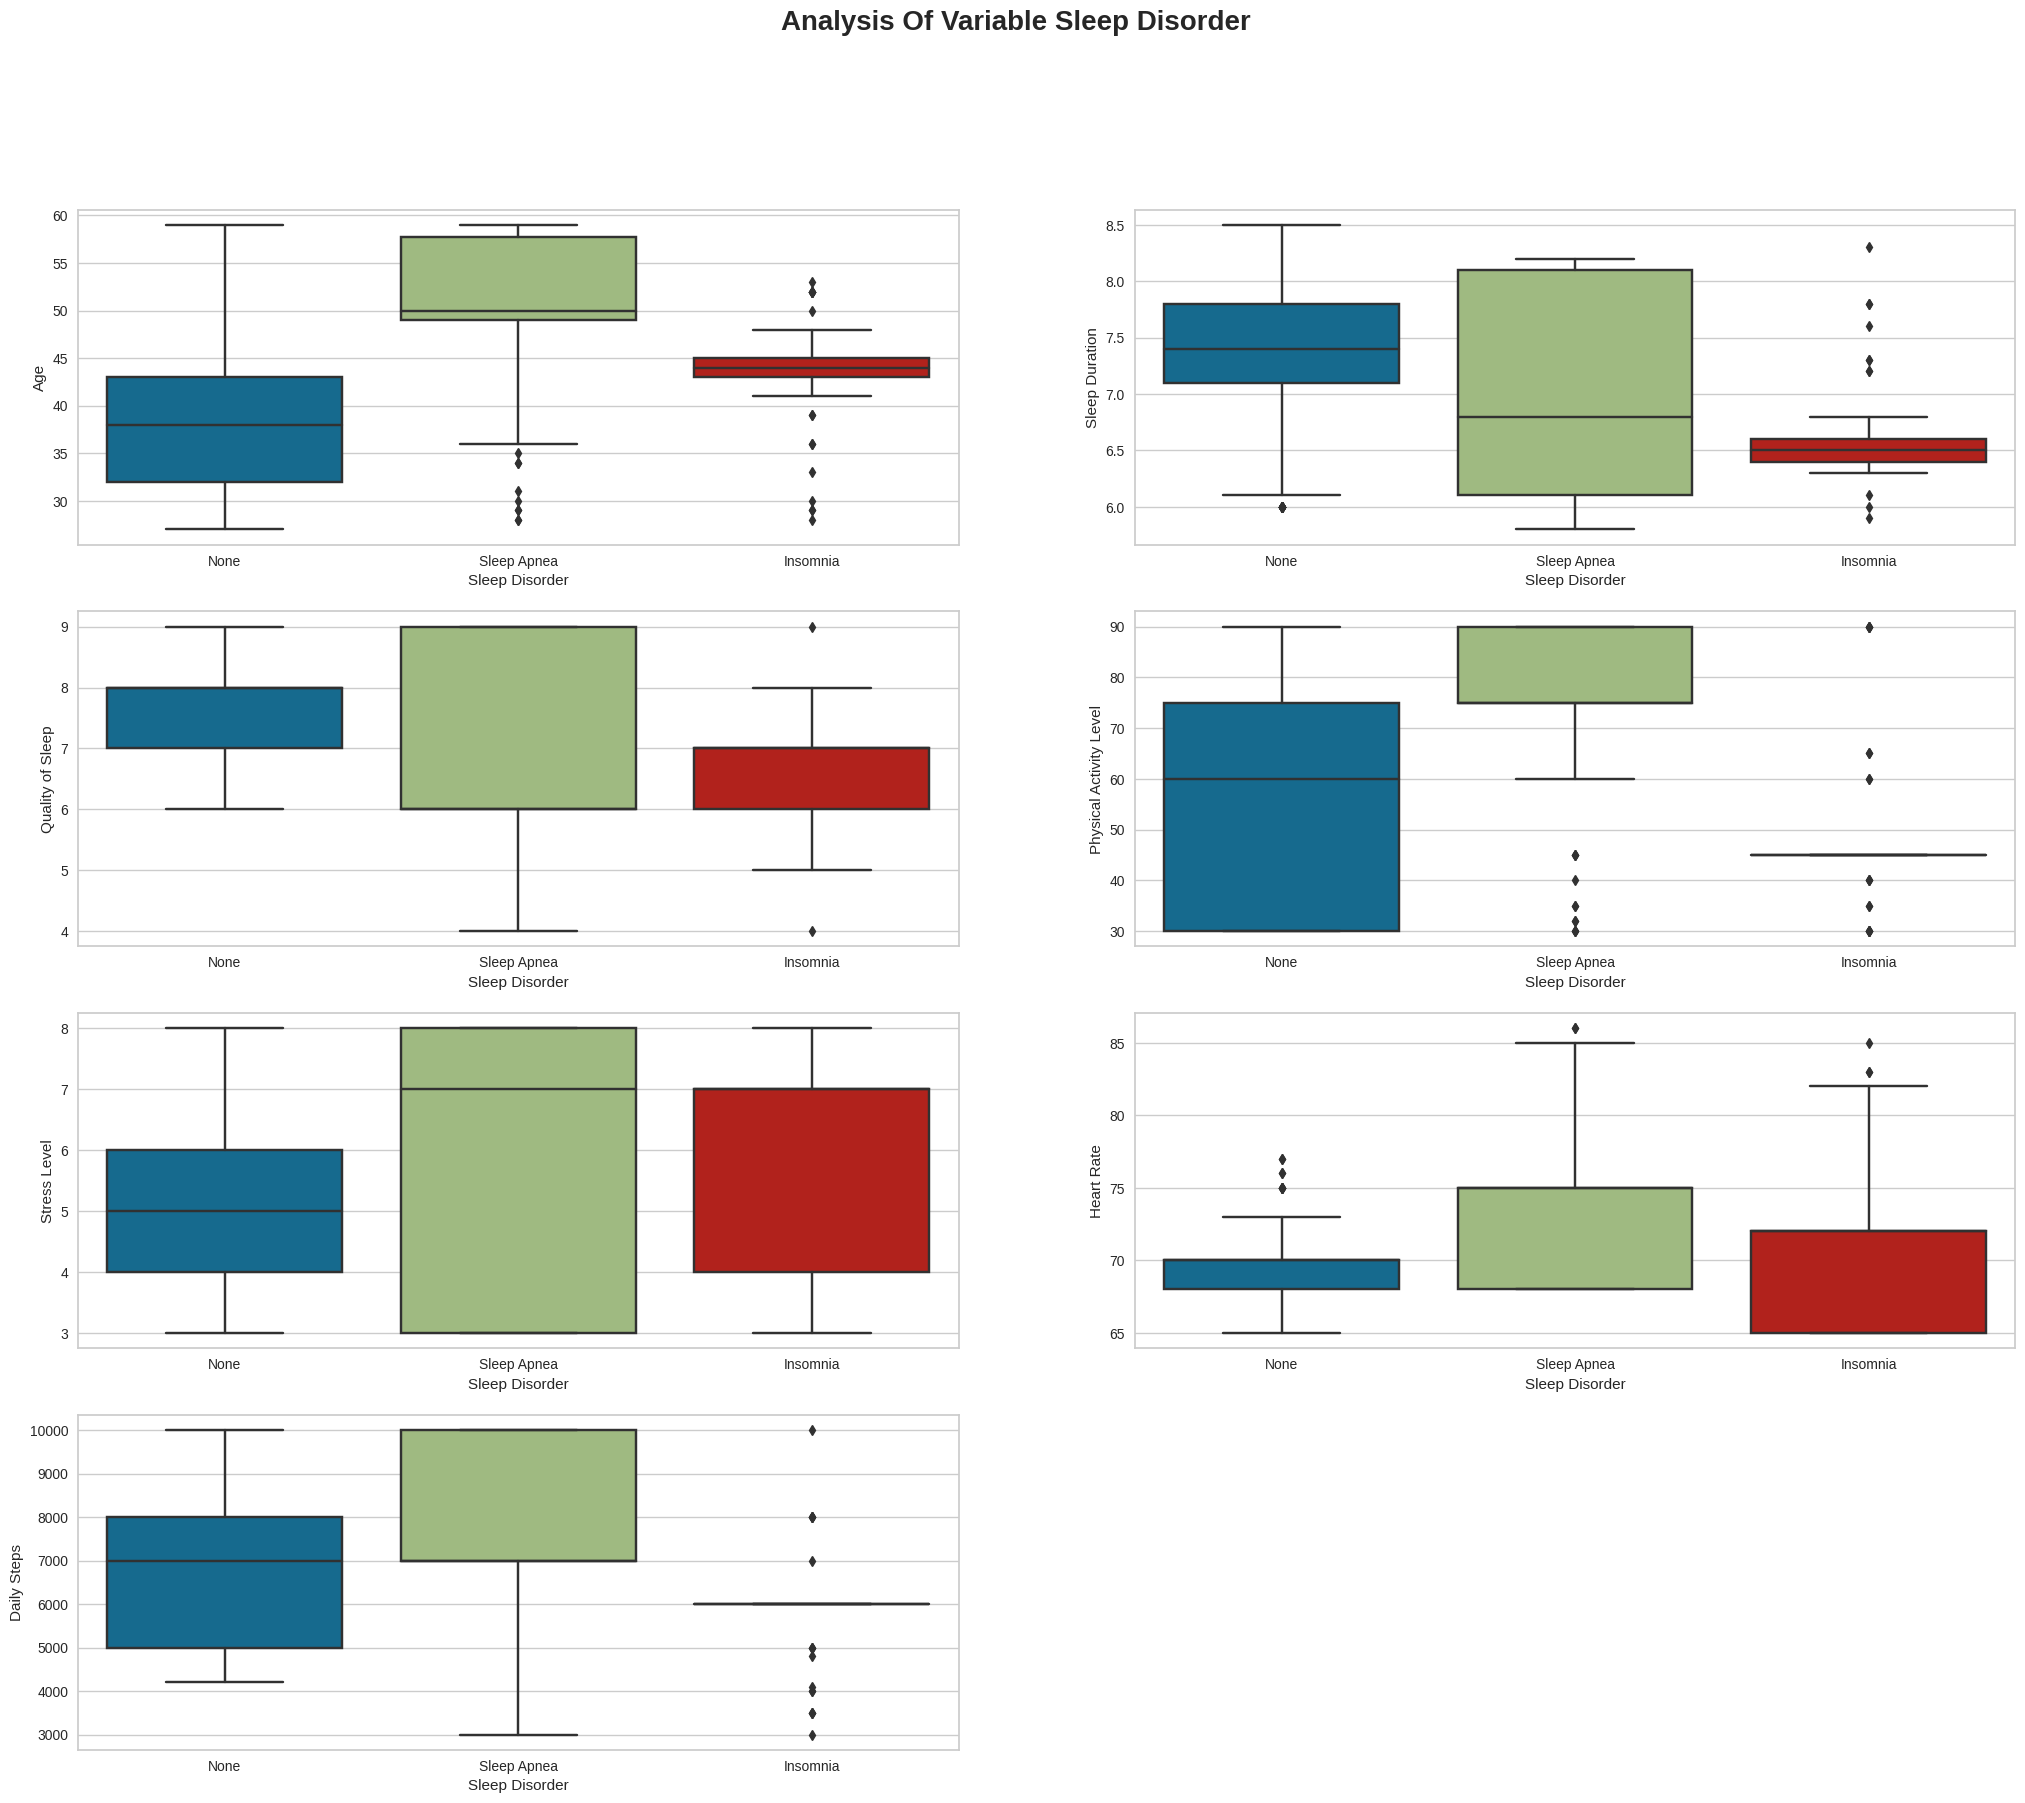

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Sleep Disorder",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="Sleep Disorder", y="Age", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="Sleep Disorder", y="Sleep Duration", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="Sleep Disorder", y="Quality of Sleep", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="Sleep Disorder", y="Physical Activity Level", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="Sleep Disorder", y="Stress Level", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="Sleep Disorder", y="Heart Rate", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="Sleep Disorder", y="Daily Steps", data=df)

# Split feature and label

In [ ]:
features = ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps']
x = df[features]
y = df['Sleep Disorder']
x.shape, y.shape

((374, 12), (374,))

In [ ]:
print(x)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [ ]:
print(y)

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object


# Model Building

Here we will remove the Person ID variable that will not be used in the models.|

In [ ]:
df = df.drop('Person ID', axis = 1)

# OneHot Label Encoder

In [ ]:
hot = pd.get_dummies(df[['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']])
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], axis = 1)

# Separating into features variables and target variable.

In [ ]:
X = df.drop('Sleep Disorder', axis = 1)
X = X.values
y = df['Sleep Disorder']

# StandardScaler

   * Here we will use StandardScaler to put our data in the same scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [ ]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
target_column_name = 'Sleep Disorder'
X = data.drop(columns=[target_column_name, 'Person ID'])
y = data[target_column_name]

In [ ]:
# One-Hot Encoding for categorical columns
X = pd.get_dummies(X, columns=['Gender', 'BMI Category', 'Occupation'], drop_first=True)


In [ ]:
# Preprocess 'Blood Pressure' column
X['Systolic Pressure'] = X['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
X['Diastolic Pressure'] = X['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))
X.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
# Encode the target variable (Sleep Disorder)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Convert y_encoded to one-hot encoded format
y_one_hot = to_categorical(y_encoded)

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features for better convergence during training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output neurons for the 3 classes
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 32ms/step - loss: 0.8472 - accuracy: 0.7531 - val_loss: 0.7610 - val_accuracy: 0.8167
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6225 - accuracy: 0.8828 - val_loss: 0.6228 - val_accuracy: 0.8167
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4874 - accuracy: 0.8912 - val_loss: 0.5412 - val_accuracy: 0.8167
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4074 - accuracy: 0.8954 - val_loss: 0.4979 - val_accuracy: 0.8500
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3589 - accuracy: 0.9079 - val_loss: 0.4743 - val_accuracy: 0.8500
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3365 - accuracy: 0.9079 - val_loss: 0.4586 - val_accuracy: 0.8667
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3178 - accuracy: 0.9163 - val_loss: 0.4577 - val_accuracy: 0.8833
Epoch 8/50
8/8 [=================

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 4ms/step - loss: 0.5215 - accuracy: 0.8800
Test accuracy: 0.8800


In [ ]:
# Predict the classes for the test set
y_probabilities = model.predict(X_test_scaled)
y_pred = np.argmax(y_probabilities, axis=1)

3/3 [==============================] - 0s 3ms/step


In [ ]:
# Create the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

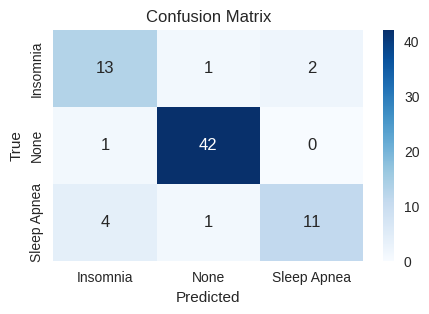

In [ ]:
# Display the confusion matrix using a heatmap
labels = label_encoder.classes_
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Generate the classification report
target_names = label_encoder.classes_
report = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



In [ ]:
pip install tensorflow scikit-learn


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Extract features and labels
numeric_features = data.select_dtypes(include=['float64', 'int64'])  # Only select numeric columns
labels = data['Sleep Disorder']


In [ ]:
# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(numeric_features)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
# Reshape the input data to be 3D for Conv1D layer
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Assuming you have 3 classes for Sleep Disorder


In [ ]:
# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 34ms/step - loss: 1.0068 - accuracy: 0.5607 - val_loss: 0.9299 - val_accuracy: 0.6000
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.9147 - accuracy: 0.6318 - val_loss: 0.8568 - val_accuracy: 0.6500
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8259 - accuracy: 0.6778 - val_loss: 0.7966 - val_accuracy: 0.6500
Epoch 4/50
8/8 [==============================] - 0s 16ms/step - loss: 0.7805 - accuracy: 0.6946 - val_loss: 0.7434 - val_accuracy: 0.6333
Epoch 5/50
8/8 [==============================] - 0s 23ms/step - loss: 0.7140 - accuracy: 0.7448 - val_loss: 0.6928 - val_accuracy: 0.7833
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.7406 - val_loss: 0.6456 - val_accuracy: 0.7833
Epoch 7/50
8/8 [==============================] - 0s 12ms/step - loss: 0.6265 - accuracy: 0.7866 - val_loss: 0.6046 - val_accuracy: 0.8167
Epoch 8/50
8/8 [=============

In [ ]:
# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy}")


3/3 [==============================] - 0s 6ms/step - loss: 0.3973 - accuracy: 0.8800
Test Accuracy: 0.8799999952316284


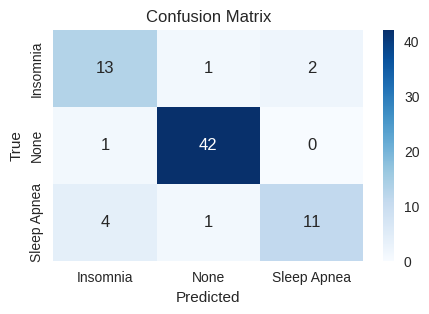

In [ ]:
# Display the confusion matrix using a heatmap
labels = label_encoder.classes_
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming 'model' is your trained Conv1D model and 'X_test' is your test data
# Get the model predictions
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the classification report
target_names = label_encoder.classes_
report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(report)


3/3 [==============================] - 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



In [ ]:
pip install pandas numpy tensorflow scikit-learn


# Feedforward Neural Network (FNN)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Load the dataset
# Assuming your dataset is in a CSV file named 'sleep_data.csv'
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Drop irrelevant columns (e.g., Person ID, Occupation, Blood Pressure, Heart Rate)
df = df.drop(columns=['Person ID'])

# Extract numerical information from 'Blood Pressure'
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])
df = df.drop(columns=['Blood Pressure'])

# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

# One-hot encode 'Occupation' column if it exists
if 'Occupation' in df.columns:
    df = pd.get_dummies(df, columns=['Occupation'])

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the FNN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Assuming y_test contains the true labels and y_pred contains the predicted labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


Epoch 1/50
10/10 [==============================] - 2s 35ms/step - loss: 0.9728 - accuracy: 0.5686 - val_loss: 0.7613 - val_accuracy: 0.7867
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6881 - accuracy: 0.8462 - val_loss: 0.5722 - val_accuracy: 0.8400
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.5328 - accuracy: 0.8896 - val_loss: 0.4648 - val_accuracy: 0.8667
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 0.4361 - accuracy: 0.9130 - val_loss: 0.4080 - val_accuracy: 0.8667
Epoch 5/50
10/10 [==============================] - 0s 11ms/step - loss: 0.3853 - accuracy: 0.9164 - val_loss: 0.3842 - val_accuracy: 0.8667
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.3529 - accuracy: 0.9197 - val_loss: 0.3818 - val_accuracy: 0.8667
Epoch 7/50
10/10 [==============================] - 0s 9ms/step - loss: 0.3379 - accuracy: 0.9197 - val_loss: 0.3907 - val_accuracy: 0.8667
Epoch 8/50
10/10

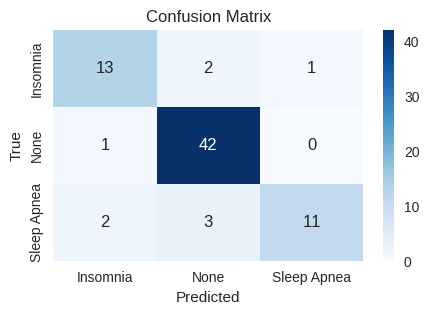

In [ ]:
# Display the confusion matrix using a heatmap

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
labels = label_encoder.classes_
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# generate classification report of above code

from sklearn.metrics import classification_report
target_names = label_encoder.classes_
report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.81      0.81      0.81        16
        None       0.89      0.98      0.93        43
 Sleep Apnea       0.92      0.69      0.79        16

    accuracy                           0.88        75
   macro avg       0.87      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75



# LSTM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the dataset
# Assuming your dataset is in a CSV file named 'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Drop irrelevant columns (e.g., Person ID, Occupation, Blood Pressure, Heart Rate)
df = df.drop(columns=['Person ID'])

# Extract numerical information from 'Blood Pressure'
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])
df = df.drop(columns=['Blood Pressure'])

# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

# One-hot encode 'Occupation' column if it exists
if 'Occupation' in df.columns:
    df = pd.get_dummies(df, columns=['Occupation'])


# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=70, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model on the test set
y_pred_probabilities = model.predict(X_test_lstm)
y_pred = y_pred_probabilities.argmax(axis=1)

# Assuming y_test contains the true labels and y_pred contains the predicted labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Epoch 1/70
10/10 [==============================] - 2s 39ms/step - loss: 1.0897 - accuracy: 0.4314 - val_loss: 1.0564 - val_accuracy: 0.4800
Epoch 2/70
10/10 [==============================] - 0s 8ms/step - loss: 1.0181 - accuracy: 0.6990 - val_loss: 0.9885 - val_accuracy: 0.7600
Epoch 3/70
10/10 [==============================] - 0s 9ms/step - loss: 0.9497 - accuracy: 0.7993 - val_loss: 0.9193 - val_accuracy: 0.7733
Epoch 4/70
10/10 [==============================] - 0s 8ms/step - loss: 0.8795 - accuracy: 0.8428 - val_loss: 0.8432 - val_accuracy: 0.8533
Epoch 5/70
10/10 [==============================] - 0s 6ms/step - loss: 0.7980 - accuracy: 0.8696 - val_loss: 0.7638 - val_accuracy: 0.8533
Epoch 6/70
10/10 [==============================] - 0s 8ms/step - loss: 0.7146 - accuracy: 0.8829 - val_loss: 0.6812 - val_accuracy: 0.8667
Epoch 7/70
10/10 [==============================] - 0s 10ms/step - loss: 0.6292 - accuracy: 0.8930 - val_loss: 0.6018 - val_accuracy: 0.8667
Epoch 8/70
10/10 [

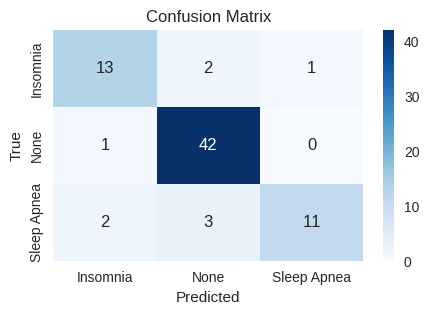

In [ ]:
#  heat map code

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# classification report

target_names = label_encoder.classes_
report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.78      0.88      0.82        16
        None       0.93      0.98      0.95        43
 Sleep Apnea       0.92      0.69      0.79        16

    accuracy                           0.89        75
   macro avg       0.88      0.85      0.85        75
weighted avg       0.90      0.89      0.89        75

